<a href="https://colab.research.google.com/github/Ymin-2/ESAA/blob/main/EDA_by_site.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/MyDrive/ESAA/project/project/open/train/train.csv')
sub = pd.read_csv('/content/drive/MyDrive/ESAA/project/project/open/sample_submission.csv')

In [4]:
train.head()

,영업일자,영업장명_메뉴명,매출수량
0,2023-01-01,느티나무 셀프BBQ_1인 수저세트,0
1,2023-01-02,느티나무 셀프BBQ_1인 수저세트,0
2,2023-01-03,느티나무 셀프BBQ_1인 수저세트,0
3,2023-01-04,느티나무 셀프BBQ_1인 수저세트,0
4,2023-01-05,느티나무 셀프BBQ_1인 수저세트,0


In [5]:
DATE_COL   = '영업일자'
TARGET_COL = '매출수량'
KEY_COLS   = ['영업장명', '메뉴명']

In [6]:
# 첫번째 '_' 기준으로 분리
train[KEY_COLS] = train['영업장명_메뉴명'].str.split('_', n=1, expand=True)

In [7]:
train.head()

,영업일자,영업장명_메뉴명,매출수량,영업장명,메뉴명
0,2023-01-01,느티나무 셀프BBQ_1인 수저세트,0,느티나무 셀프BBQ,1인 수저세트
1,2023-01-02,느티나무 셀프BBQ_1인 수저세트,0,느티나무 셀프BBQ,1인 수저세트
2,2023-01-03,느티나무 셀프BBQ_1인 수저세트,0,느티나무 셀프BBQ,1인 수저세트
3,2023-01-04,느티나무 셀프BBQ_1인 수저세트,0,느티나무 셀프BBQ,1인 수저세트
4,2023-01-05,느티나무 셀프BBQ_1인 수저세트,0,느티나무 셀프BBQ,1인 수저세트


In [8]:
# 영업장 종류
sorted(train['영업장명'].unique())

['느티나무 셀프BBQ', '담하', '라그로타', '미라시아', '연회장', '카페테리아', '포레스트릿', '화담숲주막', '화담숲카페']

In [9]:
# 영업장별 데이터 수
train['영업장명'].value_counts()

,count
영업장명,
담하,22344
미라시아,16492
라그로타,13300
카페테리아,12768
느티나무 셀프BBQ,12236
연회장,12236
포레스트릿,6384
화담숲주막,4256
화담숲카페,2660


In [10]:
train.isnull().sum().sort_values(ascending=False)

,0
영업일자,0
영업장명_메뉴명,0
매출수량,0
영업장명,0
메뉴명,0


In [11]:
train.dtypes

,0
영업일자,object
영업장명_메뉴명,object
매출수량,int64
영업장명,object
메뉴명,object


In [12]:
train['영업일자'] = pd.to_datetime(train['영업일자'])

In [13]:
train['매출수량'].describe()

,매출수량
count,102676.000000
mean,10.653083
std,41.887692
min,-80.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,1372.000000


min: -80 -> 음수 존재  
50%: 0 -> 전체 데이터 절반 이상이 0  
max: 1372 -> median 대비 과도하게 큼  
std: 41.9 -> mean 대비 과도하게 큼  
--> 이벤트/단체/특정 일자 폭증 존재

In [14]:
# 음수 개수 확인
(train['매출수량'] < 0).sum()

np.int64(14)

In [15]:
# 영업장별 0 비율
(train.groupby('영업장명')['매출수량'].apply(lambda x: (x == 0).mean()).sort_values(ascending=False))

,매출수량
영업장명,
연회장,0.660919
느티나무 셀프BBQ,0.601422
라그로타,0.597594
미라시아,0.519888
화담숲카페,0.473684
화담숲주막,0.470865
담하,0.469298
카페테리아,0.441024
포레스트릿,0.420583


In [16]:
# 영업장별 음수 개수
(train.query('매출수량 < 0').groupby('영업장명').size().sort_values(ascending=False))

,0
영업장명,
포레스트릿,5
연회장,4
느티나무 셀프BBQ,2
미라시아,2
카페테리아,1


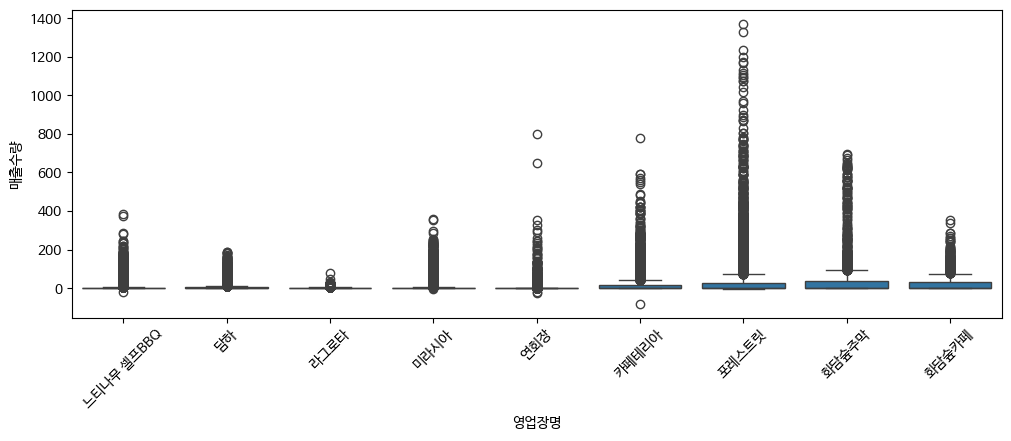

In [17]:
# 업장별 이상치 확인
plt.figure(figsize=(12,4))
sns.boxplot(data=train, x='영업장명', y='매출수량')
plt.xticks(rotation=45)
plt.show()

이상치가 과도하게 많음 X  
분포 자체가 대부분의 날에는 아예 안 팔리거나 조금만 팔리는데, 가끔씩 엄청 크게 팔리는 날이 있는 구조

포레스트릿: 상단 점이 제일 높고(최대 1300대), 스파이크가 가장 큼

화담숲주막/카페: 600~700대 스파이크 존재

연회장: 0 비율도 높고(0.66), 스파이크도 있음 → “행사/단체” 느낌

나머지는 상대적으로 낮지만 그래도 outlier 점이 많이 보임

In [18]:
# 음수 -> 0
train.loc[train['매출수량'] < 0, '매출수량'] = 0

In [19]:
# 업장별 상위 1% 기준치(스파이크 강도) 보기
train.groupby('영업장명')['매출수량'].quantile(0.99).sort_values(ascending=False)

,매출수량
영업장명,
포레스트릿,627.17
화담숲주막,476.60
카페테리아,190.33
화담숲카페,184.82
느티나무 셀프BBQ,110.00
미라시아,110.00
담하,66.57
연회장,44.00
라그로타,11.00


In [20]:
# 업장별 상위 10개 뽑아서 날짜/메뉴 확인
top_outliers = (
    train.sort_values('매출수량', ascending=False)
         .loc[:, ['영업일자','영업장명','메뉴명','매출수량']]
         .head(50)
)
top_outliers

,영업일자,영업장명,메뉴명,매출수량
89753,2024-01-13,포레스트릿,꼬치어묵,1372
89767,2024-01-27,포레스트릿,꼬치어묵,1329
89760,2024-01-20,포레스트릿,꼬치어묵,1235
90299,2024-01-27,포레스트릿,떡볶이,1200
90285,2024-01-13,포레스트릿,떡볶이,1174
89410,2023-02-04,포레스트릿,꼬치어묵,1165
89398,2023-01-23,포레스트릿,꼬치어묵,1130
89746,2024-01-06,포레스트릿,꼬치어묵,1114
89403,2023-01-28,포레스트릿,꼬치어묵,1107
89733,2023-12-24,포레스트릿,꼬치어묵,1094


포레스트릿: 꼬치어묵, 떡볶이, 생수

날짜: 주말/특정 시즌(1월, 연말, 겨울)

메뉴/업장 반복적으로 등장

--> 구조적 대량 판매일 가능성 높음 --> 이상치 제거 하지 않음

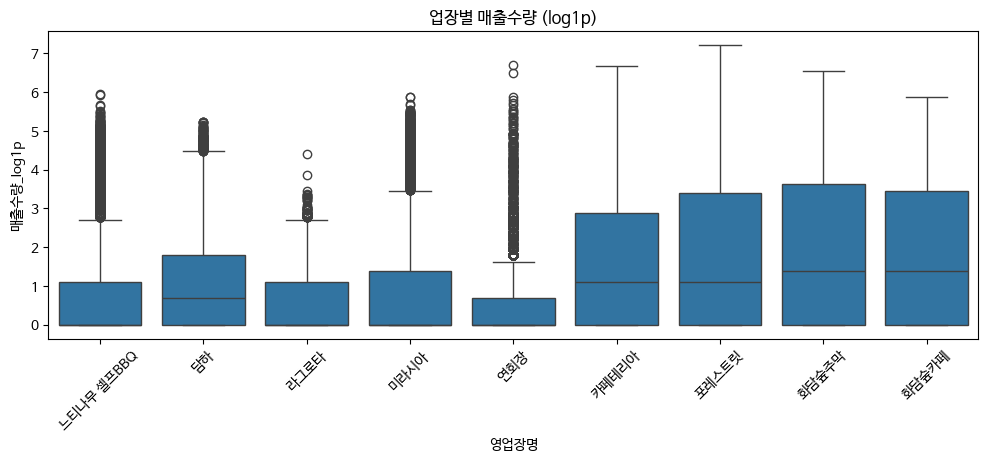

In [21]:
# 박스플롯 log 스케일로 다시 그리기
train['매출수량_log1p'] = np.log1p(train['매출수량'])

plt.figure(figsize=(12,4))
sns.boxplot(data=train, x='영업장명', y='매출수량_log1p')
plt.xticks(rotation=45)
plt.title('업장별 매출수량 (log1p)')
plt.show()

In [22]:
# 날짜 파생 변수
train['year'] = train['영업일자'].dt.year
train['month'] = train['영업일자'].dt.month
train['dow'] = train['영업일자'].dt.dayofweek
train['weekend'] = train['dow'].isin([5,6]).astype(int)

In [23]:
# 업장-메뉴별 얼마나 잘 팔리는지(활성화율)
menu_activity = (
    train.groupby(['영업장명','메뉴명'])['매출수량']
         .apply(lambda x: (x > 0).mean())
         .reset_index(name='sell_rate')
)

menu_activity.sort_values('sell_rate').head(10)

# 0 -> 1 잘 팔림

,영업장명,메뉴명,sell_rate
24,담하,(단체) 생목살 김치전골 2.0,0.133459
46,담하,명인안동소주,0.146617
48,담하,문막 복분자 칵테일,0.146617
25,담하,(단체) 은이버섯 갈비탕,0.157895
72,라그로타,모둠 해산물 플래터,0.157895
95,미라시아,공깃밥,0.163534
159,카페테리아,진사골 설렁탕,0.167293
23,담하,(단체) 공깃밥,0.174812
114,미라시아,잭 애플 토닉,0.186090
137,연회장,마라샹궈,0.197368


In [24]:
# 업장-메뉴별 스케일 차이
menu_scale = (
    train.groupby(['영업장명','메뉴명'])['매출수량']
         .agg(['mean','median','max','std'])
         .reset_index()
)

menu_scale.sort_values('max', ascending=False).head(10)

,영업장명,메뉴명,mean,median,max,std
168,포레스트릿,꼬치어묵,129.203008,1.0,1372,250.098595
169,포레스트릿,떡볶이,106.065789,2.0,1200,207.254780
171,포레스트릿,생수,77.904135,6.0,896,149.379786
132,연회장,Regular Coffee,14.193609,0.0,800,56.009803
158,카페테리아,오픈푸드,10.990602,0.0,780,58.534889
187,화담숲주막,해물파전,113.018797,22.0,695,177.150706
175,포레스트릿,치즈 핫도그,57.150376,4.0,627,100.027378
147,카페테리아,단체식 18000(신),50.095865,0.0,570,96.124195
146,카페테리아,단체식 13000(신),39.067669,0.0,553,82.073867
178,포레스트릿,코카콜라,41.426692,2.0,518,83.431876


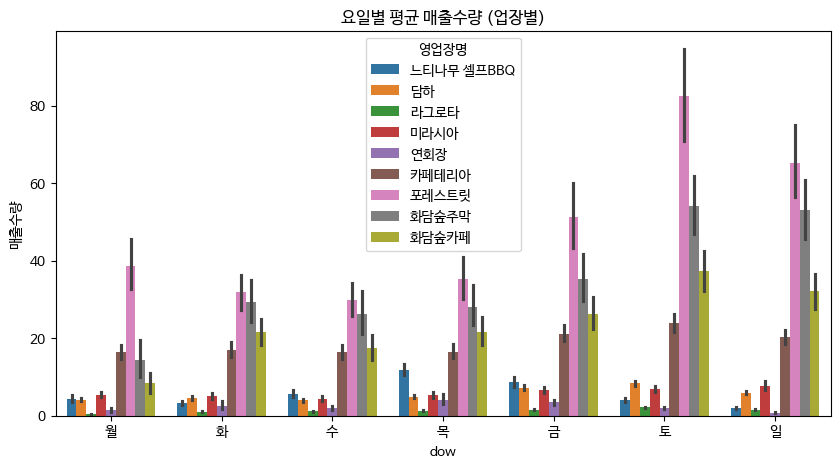

In [25]:
# 요일 X 업장 평균 매출
plt.figure(figsize=(10,5))
sns.barplot(
    data=train,
    x='dow',
    y='매출수량',
    hue='영업장명',
    estimator=np.mean
)
plt.title('요일별 평균 매출수량 (업장별)')
plt.xticks(range(7), ['월','화','수','목','금','토','일'])
plt.show()

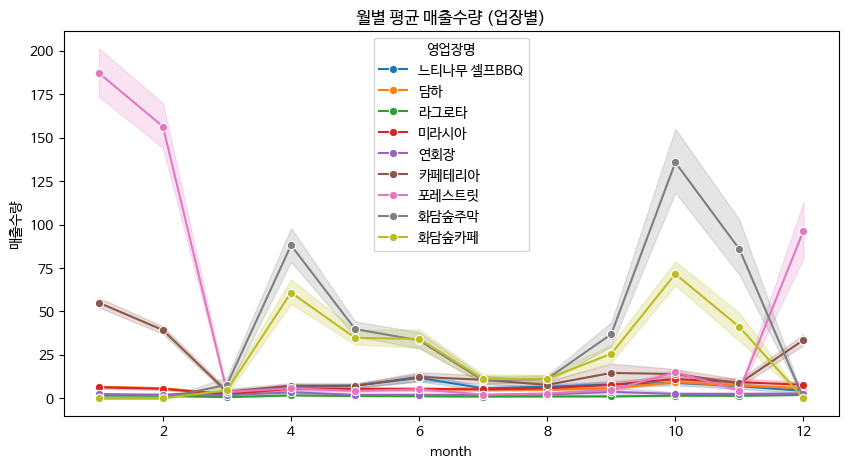

In [26]:
# 월별 패턴(계절성)
plt.figure(figsize=(10,5))
sns.lineplot(
    data=train,
    x='month',
    y='매출수량',
    hue='영업장명',
    estimator=np.mean,
    marker='o'
)
plt.title('월별 평균 매출수량 (업장별)')
plt.show()

데이터 수는 '담하', '미라시아'가 제일 많음, 그러나 값이 작고 안정적임  
특이 패턴: 포레스트릿, 화담숲주막, 화담숲카페 + 카페테리아

일반 식음 업장: 담하, 미라시아, 라그로타, 느티나무 셀프BBQ  -> 비교적 안정적, 스케일 작음

관광지/유동형 업장: 포레스트릿, 화담숲 주막, 화담숲 카페, 카페테리아  -> 0 많음, 대량 폭증

In [27]:
# 업장 유형 컬럼 생성
flow_stores = ['포레스트릿', '화담숲주막', '화담숲카페', '카페테리아']

train['store_type'] = np.where(
    train['영업장명'].isin(flow_stores),
    'flow',      # 유동형
    'normal'     # 일반 식음
)

In [28]:
train['store_type'].value_counts()

,count
store_type,
normal,76608
flow,26068


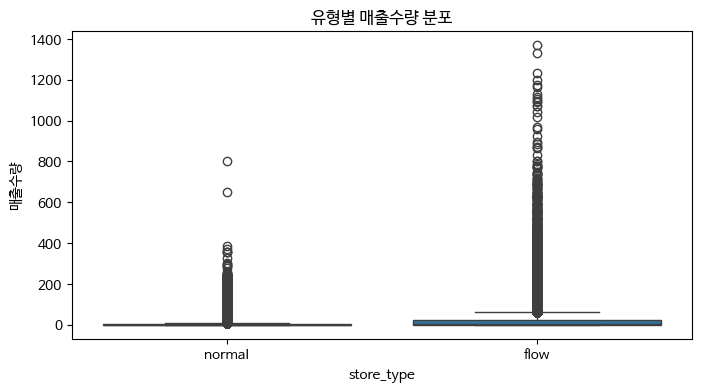

In [29]:
# 유형별 분포 확인
plt.figure(figsize=(8,4))
sns.boxplot(data=train, x='store_type', y='매출수량')
plt.title('유형별 매출수량 분포')
plt.show()

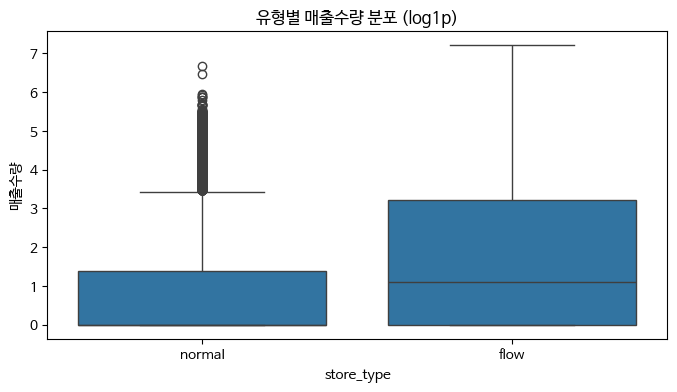

In [30]:
# log 스케일로 확인
plt.figure(figsize=(8,4))
sns.boxplot(
    data=train,
    x='store_type',
    y=np.log1p(train['매출수량'])
)
plt.title('유형별 매출수량 분포 (log1p)')
plt.show()

In [31]:
# 타깃 변환 + 날짜 파생 변수
train['매출수량_log1p'] = np.log1p(train['매출수량'])

train['dow'] = train['영업일자'].dt.dayofweek
train['weekend'] = train['dow'].isin([5,6]).astype(int)
train['month'] = train['영업일자'].dt.month

In [32]:
# 메뉴 활동성
menu_sell_rate = (
    train.groupby(['영업장명','메뉴명'])['매출수량']
         .apply(lambda x: (x > 0).mean())
         .reset_index(name='sell_rate')
)

train = train.merge(menu_sell_rate, on=['영업장명','메뉴명'], how='left')